<a href="https://colab.research.google.com/github/AryanilAD/Corporate-Training-Mini_Projects/blob/main/DBscan_clustering_on_customer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Performing DBscan on Customer data to determine relationship between the variables and making a cluster**.

# **IMPORTING LIBRARIES**

---



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy

# **IMPORTING DATASET**

---


In [ ]:
df = pd.read_csv('/content/Wholesale customers data.csv')

In [ ]:
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [ ]:
# Check for missing values
print(df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
df.duplicated(keep=False).sum()

0

# **Correlation Network Graph**

---



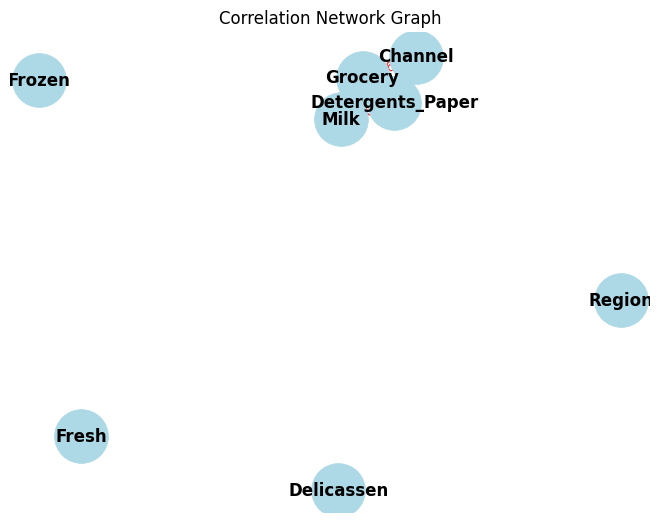

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


corr_matrix = df.corr()
G = nx.Graph()
for column in corr_matrix.columns:
    G.add_node(column)
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=corr_matrix.iloc[i, j])


pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_weight='bold', linewidths=0.5, edge_color='gray')

edge_labels = {(i, j): round(d['weight'], 2) for i, j, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Correlation Network Graph')
plt.show()


A correlation network diagram that illustrates the connections between several sales channels. The graph's nodes stand in for the various channels, and the edges connecting the nodes for the correlations between the channels. The degree of correlation is shown by the thickness of the edges.

The channel grocery has the greatest links to other channels, as can be seen in the graph. This implies that the channel that relates to other channels the most is the supermarket channel. There are numerous links between the milk channel and the detergents_paper channel and other channels.

Additionally, the graph demonstrates some negative connections between the channels. For instance, there is a negative association between the supermarket channel and the frozen channel. Accordingly, sales in the grocery channel typically tend to be low and vice versa when sales in the frozen channel are strong.

All things considered, the correlation network graph offers a helpful means of visualizing the connections among various sales channels. With the use of this data, cross-promotional opportunities and customer segment-specific marketing plans can be developed.



In [ ]:
selected_features = df[['Grocery', 'Milk', 'Detergents_Paper']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.7, min_samples=4)  # Adjust parameters accordingly
labels= dbscan.fit_predict(scaled_features)

In addition to managing noise points, DBSCAN is helpful in locating clusters of various sizes and forms.
For clustering to be effective, the eps and min_samples parameters must be chosen carefully.

When eps=1.6, points will be regarded as neighbors if they are within a 1.7 unit radius.

A cluster is said to require a minimum of four points in order to create a dense region, or min_samples=4.

In [ ]:
silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.7477153095824238


The silhouette score calculates an object's cohesiveness (similarity to its own cluster) and separation (from other clusters) from each other. The score is a number between -1 and 1, where:
A score close to +1 denotes a well-clustered sample because it is far from the nearby clusters.
When a sample has a score of 0, it means that it is on or very near the decision boundary between two nearby clusters.


With a silhouette score of 0.7477, the objects in each cluster are reasonably close to one another when compared to the objects in other clusters, indicating that the clusters are well-separated. This high silhouette score (almost 1), which denotes dense and well-separated clusters, is usually regarded as good.




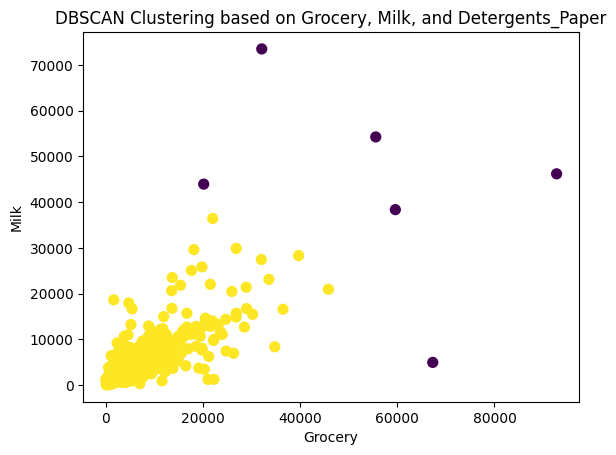

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Grocery'], df['Milk'], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering based on Grocery, Milk, and Detergents_Paper')
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()


The grocery, milk, and paper/detergent data points are scattered. This is a geographical grouping algorithm based on density. This indicates that, depending on a distance threshold, it clusters locations with similar densities together.

The lower left corner displays a dense cluster of dots, indicating a substantial association between the quantity of milk and the detergents/paper that consumers purchase. Additionally, there are a few dots sporadically spaced farther apart, which may represent outliers or clients with distinct purchasing patterns.

Customers can be divided into two broad categories: those who purchase a lot of milk, detergents, and paper goods, and those who don't. Retailers might utilize this to target particular customer segments with their marketing and promotions.
